# 0.0 IMPORTS

In [26]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # ou outra arquitetura de CNN
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt 

from functools import partial


In [16]:
tf.keras.backend.clear_session()

In [17]:
path = 'C:/Users/edils/repos/brain_tumor_detection/data/'

source_path_yes = os.path.join(path, 'yes')
source_path_no = os.path.join(path, 'no')

print(len(os.listdir(source_path_yes)))
print(len(os.listdir(source_path_no)))

155
98


In [33]:
train_datagen, val_datagen = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode = 'int',
    batch_size=8,
    image_size=(150,150),
    shuffle=True,
    seed = 13,
    validation_split = 0.2,
    subset='both'
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Using 50 files for validation.


In [31]:
for image_batch, labels_batch in train_datagen:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(8, 150, 150, 3)
(8,)


In [20]:
# DefaultConv2D = partial(tf.keras.layers.Conv2D, 
#                         kernel_size=3, 
#                         padding='same', 
#                         activation='relu',
#                         kernel_initializer='he_normal')

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Rescaling(1/255, input_shape=(224,224,3)),
#     DefaultConv2D(filters=64, kernel_size=7),
#     tf.keras.layers.MaxPool2D(),
#     DefaultConv2D(filters=128),
#     DefaultConv2D(filters=128),
#     tf.keras.layers.MaxPool2D(),
#     DefaultConv2D(filters=256),
#     DefaultConv2D(filters=256),
#     tf.keras.layers.MaxPool2D(),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128,
#                           activation='relu',
#                           kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=64,
#                           activation='relu',
#                           kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=1, activation='sigmoid')
# ])

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1/255, input_shape=(150, 150, 3)),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [21]:
model = create_model()

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0

In [24]:
# epochs=30
# batch_size=8
# early_stopping = EarlyStopping(
#                 monitor='val_accuracy', 
#                 mode='max',
#                 patience=6
# )

# history = model.fit(
#         train_generator,
#         epochs=epochs,
#         validation_data=validation_generator,
#         callbacks=[early_stopping]
# )

history = model.fit(train_datagen, validation_data=val_datagen, epochs=10)

Epoch 1/10
26/26 [==============================] - 2s 51ms/step - loss: 0.6331 - accuracy: 0.6946 - val_loss: 0.4922 - val_accuracy: 0.8200
Epoch 2/10
26/26 [==============================] - 1s 48ms/step - loss: 0.5032 - accuracy: 0.7685 - val_loss: 0.4805 - val_accuracy: 0.8400
Epoch 3/10
26/26 [==============================] - 1s 53ms/step - loss: 0.3879 - accuracy: 0.8473 - val_loss: 0.4571 - val_accuracy: 0.8400
Epoch 4/10
26/26 [==============================] - 1s 50ms/step - loss: 0.1954 - accuracy: 0.9360 - val_loss: 0.6879 - val_accuracy: 0.8600
Epoch 5/10
26/26 [==============================] - 1s 49ms/step - loss: 0.1462 - accuracy: 0.9310 - val_loss: 0.6984 - val_accuracy: 0.7600
Epoch 6/10
26/26 [==============================] - 1s 49ms/step - loss: 0.0973 - accuracy: 0.9655 - val_loss: 0.6468 - val_accuracy: 0.8600
Epoch 7/10
26/26 [==============================] - 1s 50ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.9846 - val_accuracy: 0.8600
Epoch 8/10
26

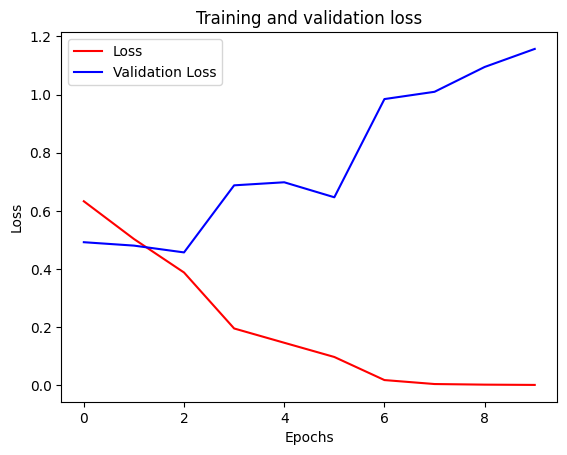

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs =[*range(10)]

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()